<a href="https://colab.research.google.com/github/eshreyareddy/Clustering/blob/main/k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#K-Means Clustering
K-Means clustering is a fundamental technique in the field of data science and machine learning, particularly within the realm of unsupervised learning. Clustering, as a concept, refers to the process of grouping a set of objects in such a way that objects in the same group (or cluster) are more similar to each other than to those in other groups. The goal is to discover underlying patterns or structures in a dataset without the guidance of a known outcome or label.

**K-Means Clustering: An Overview**
K-Means clustering is a method used to automatically partition a dataset into K distinct, non-overlapping subgroups (clusters) where each data point belongs to only one group. It aims to minimize the intra-cluster variances (i.e., the squared distances between the data points and the centroid of their respective clusters) while maximizing the inter-cluster distances.

**How K-Means Works**
* Initialization: K initial "means" (centroids) are generated at random.
* Assignment: Each data point is assigned to the nearest centroid, and thus clusters are formed.
* Update: The centroids are recalculated as the center of the clusters resulting from the assignment step.


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)
#print(os.listdir("../input"))

In [3]:
from google.colab import files

uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [4]:
df = pd.read_csv(r'Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.shape
df.describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [8]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
plt.style.use('fivethirtyeight')

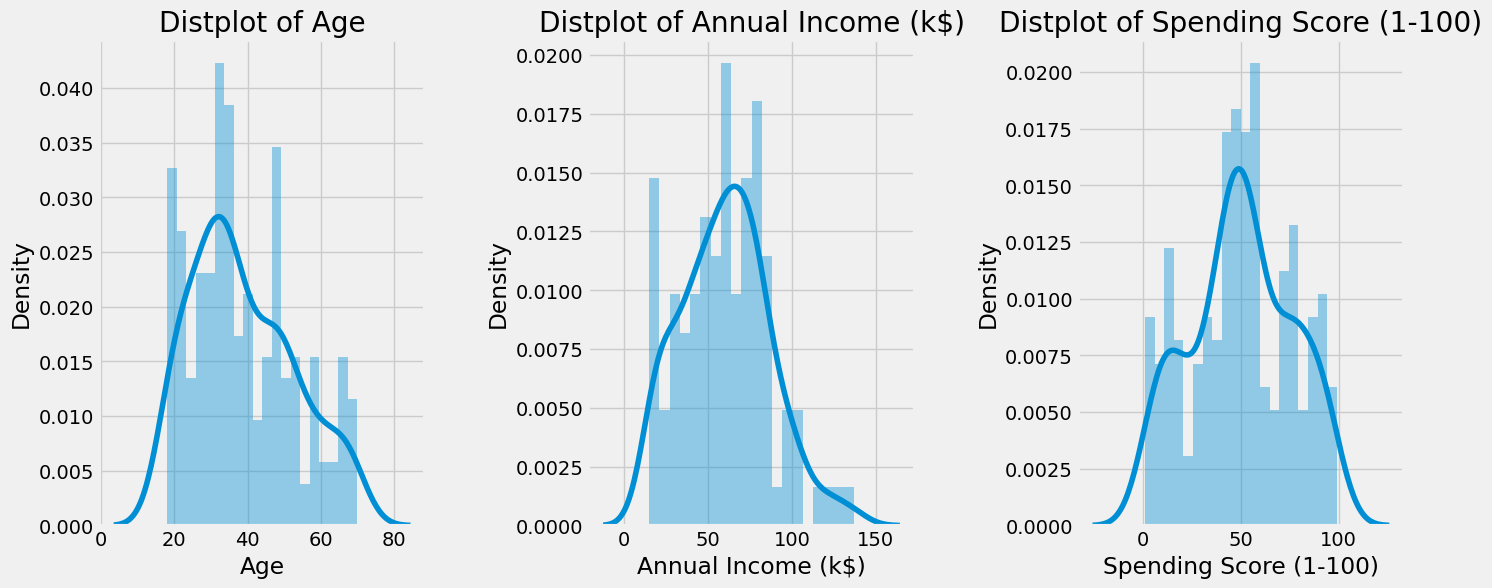

In [10]:
plt.figure(1 , figsize = (15 , 6))
n = 0
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

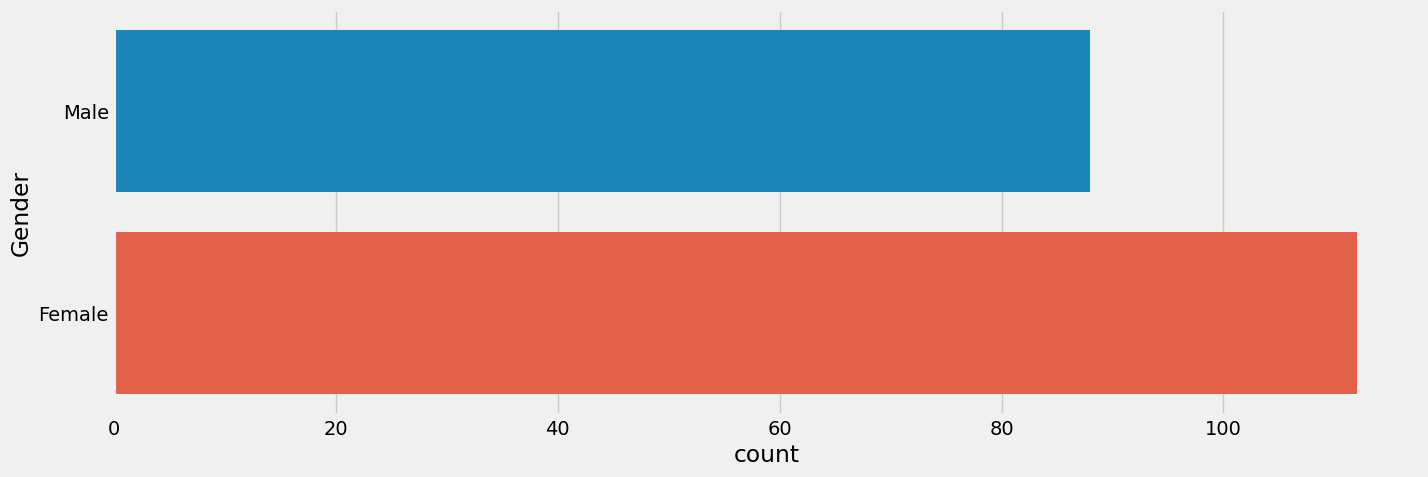

In [11]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Gender' , data = df)
plt.show()

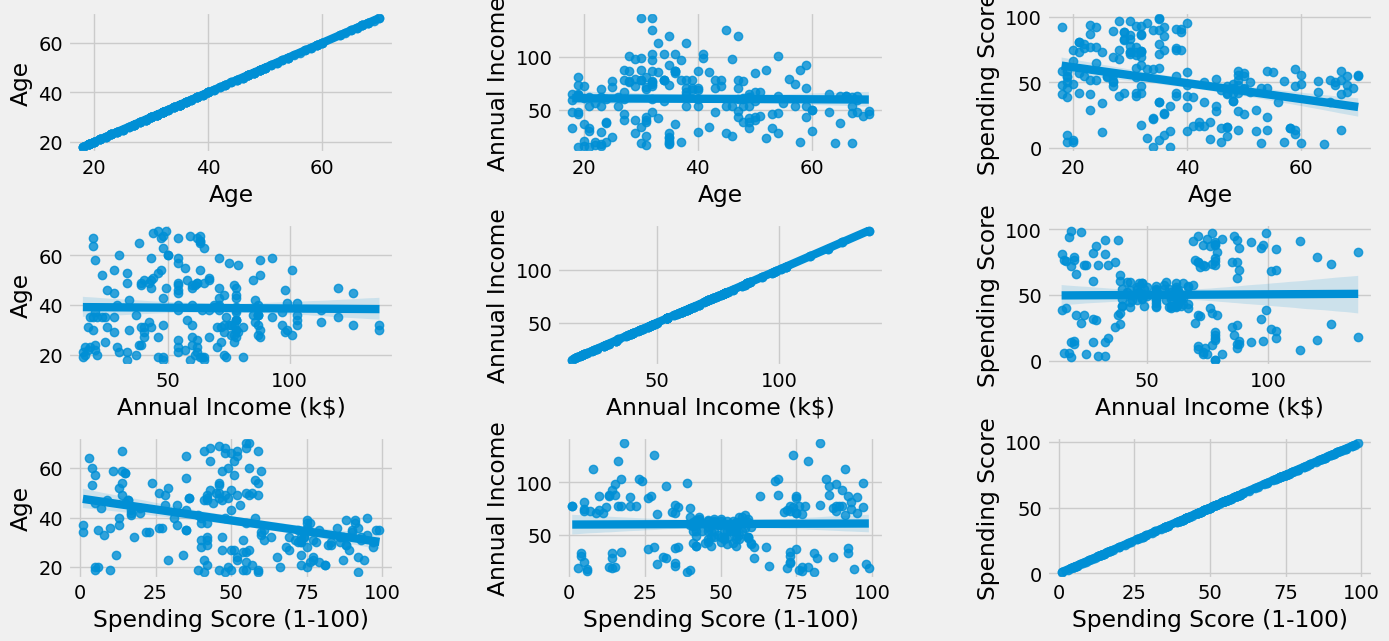

In [12]:
plt.figure(1 , figsize = (15 , 7))
n = 0
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

In [14]:
import pandas as pd

# Replace 'path_to_your_file' with the actual path where the dataset is located
data = pd.read_csv('Mall_Customers.csv')


In [15]:
selected_data = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]


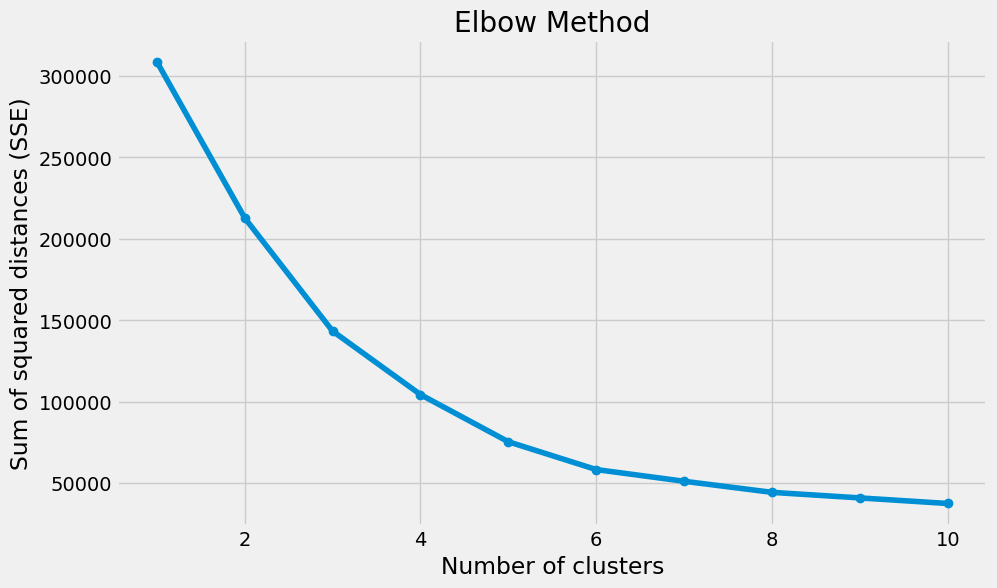

In [17]:
# Selecting only the numerical columns for clustering
selected_data = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Using the Elbow Method to find the optimal number of clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(selected_data)
    sse.append(kmeans.inertia_)

# Plotting the Elbow Method results
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances (SSE)')
plt.grid(True)
plt.show()


The dataset contains the following columns:

* CustomerID: Unique identifier for each customer.
*Gender: The gender of the customer (Male/Female).
*Age: The age of the customer.
*Annual Income (k$)$: The annual income of the customer in thousands of dollars.
*Spending Score (1-100): A score assigned to the customer based on their spending behavior.



For the K-Means clustering, we can focus on numerical variables like Age, Annual Income (k$)$, and Spending Score (1-100). The Gender column is categorical and would require encoding, but for simplicity, we can exclude it in this initial analysis.

Next, I will perform the Elbow Method to determine the optimal number of clusters. This involves calculating the sum of squared distances (SSE) for a range of cluster numbers and looking for the 'elbow' point in the plot. Let's proceed with this step.

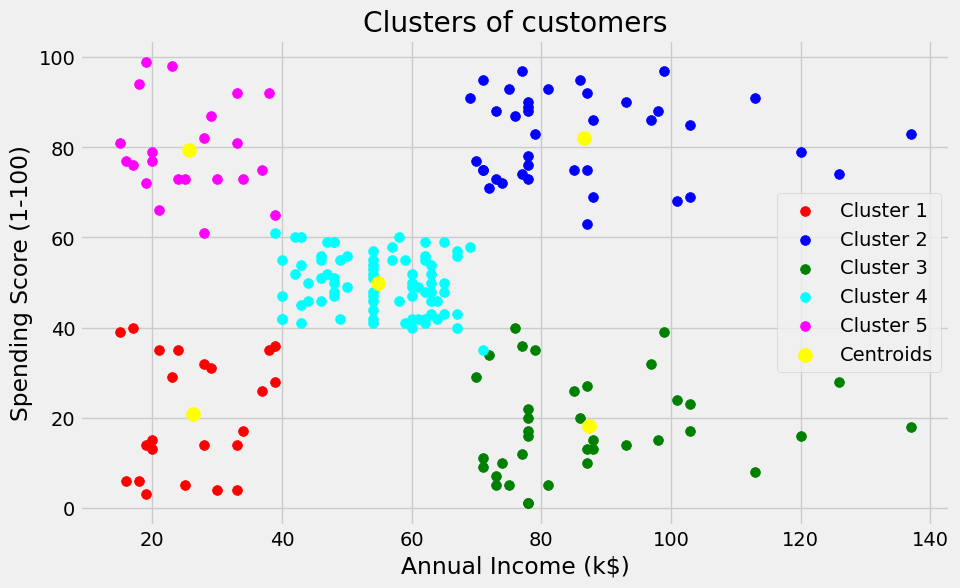

In [18]:
# Applying K-Means clustering with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(selected_data)
data['Cluster'] = clusters

# Visualizing the clusters - using 'Annual Income' and 'Spending Score' for the plot
plt.figure(figsize=(10, 6))
plt.scatter(data['Annual Income (k$)'][data['Cluster'] == 0], data['Spending Score (1-100)'][data['Cluster'] == 0], s=50, c='red', label='Cluster 1')
plt.scatter(data['Annual Income (k$)'][data['Cluster'] == 1], data['Spending Score (1-100)'][data['Cluster'] == 1], s=50, c='blue', label='Cluster 2')
plt.scatter(data['Annual Income (k$)'][data['Cluster'] == 2], data['Spending Score (1-100)'][data['Cluster'] == 2], s=50, c='green', label='Cluster 3')
plt.scatter(data['Annual Income (k$)'][data['Cluster'] == 3], data['Spending Score (1-100)'][data['Cluster'] == 3], s=50, c='cyan', label='Cluster 4')
plt.scatter(data['Annual Income (k$)'][data['Cluster'] == 4], data['Spending Score (1-100)'][data['Cluster'] == 4], s=50, c='magenta', label='Cluster 5')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=100, c='yellow', label='Centroids')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()


The visualization above displays the clusters formed by the K-Means algorithm on the Mall Customers dataset. Each cluster is represented by a different color, and the yellow dots represent the centroids of each cluster. These clusters are formed based on two features: 'Annual Income (k$)' and 'Spending Score (1-100)'.

**Analysis of Clusters:**
* Cluster 1 (Red): This cluster seems to represent customers with moderate to high annual income but low spending scores. These could be seen as careful spenders.

* Cluster 2 (Blue): Customers in this cluster have low annual income and low spending scores. They might represent the more conservative customer segment.

* Cluster 3 (Green): This cluster includes customers with high annual income and high spending scores, possibly representing the most lucrative customer segment for targeted marketing.

* Cluster 4 (Cyan): Customers with low annual income but high spending scores fall into this cluster. This group might consist of younger or more impulsive buyers.

* Cluster 5 (Magenta): This cluster represents customers with moderate annual income and moderate to high spending scores, a middle-ground consumer group.


These insights can be quite valuable for targeted marketing strategies, customer segmentation, and understanding consumer behavior. Each cluster represents a distinct group of customers with similar characteristics in terms of income and spending habits, which can be leveraged for more personalized customer engagement and service offerings.